In [2]:
import pandas as pd

# Load the dataset
# Replace 'your_dataset.csv' with the actual file path of your dataset
data = pd.read_csv('/Users/ernestgaisie/Desktop/heart-disease-prediction/model/cleaning/cleaned_data_numeric.csv')

# Display the first few rows to confirm import
print(data.head())

# Check the dataset structure
print(data.info())


   Sex  GeneralHealth  PhysicalHealthDays  MentalHealthDays  LastCheckupTime  \
0    1              1                 4.0               0.0                0   
1    0              1                 0.0               0.0                0   
2    0              1                 0.0               0.0                0   
3    1              3                 5.0               0.0                0   
4    1              2                 3.0              15.0                0   

   PhysicalActivities  SleepHours  RemovedTeeth  HeartDisease  HadAngina  ...  \
0                   1         9.0             3             0          0  ...   
1                   1         6.0             3             0          0  ...   
2                   0         8.0             1             0          0  ...   
3                   1         9.0             3             0          0  ...   
4                   1         5.0             0             0          0  ...   

   HeightInMeters  WeightInKilog

Correlations with HeartDisease:

HeartDisease                 1.000000
HadAngina                    0.446188
GeneralHealth                0.185873
HadStroke                    0.176487
AgeCategory                  0.173055
ChestScan                    0.167567
DifficultyWalking            0.159681
HadDiabetes                  0.145743
PhysicalHealthDays           0.132900
HadCOPD                      0.132265
PneumoVaxEver                0.119846
HadArthritis                 0.117008
HadKidneyDisease             0.108527
DeafOrHardOfHearing          0.096897
DifficultyErrands            0.088348
DifficultyDressingBathing    0.083015
BlindOrVisionDifficulty      0.073040
DifficultyConcentrating      0.050149
HadSkinCancer                0.050145
FluVaxLast12                 0.045692
WeightInKilograms            0.039997
BMI                          0.032018
MentalHealthDays             0.024452
HeightInMeters               0.023588
HadAsthma                    0.023079
HadDepressiveDiso

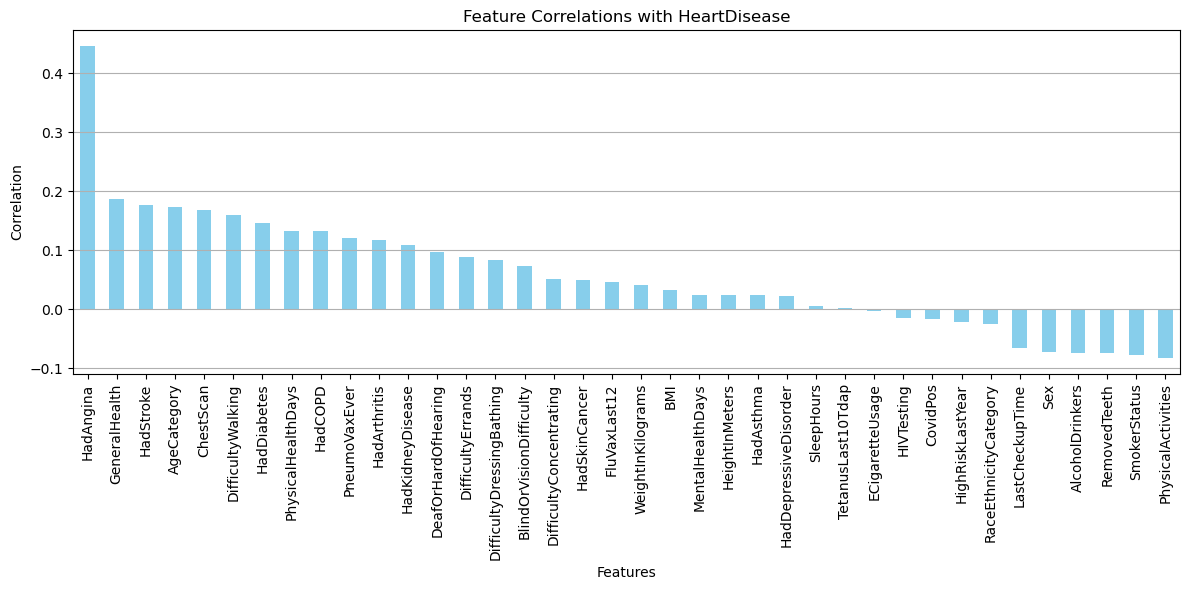


Correlation of Interaction Terms with HeartDisease:
DifficultyWalking_GeneralHealth: 0.18
HadAngina_GeneralHealth: 0.43
AgeCategory_HadStroke: 0.18
HadDiabetes_DifficultyWalking: 0.14
PhysicalHealthDays_GeneralHealth: 0.16


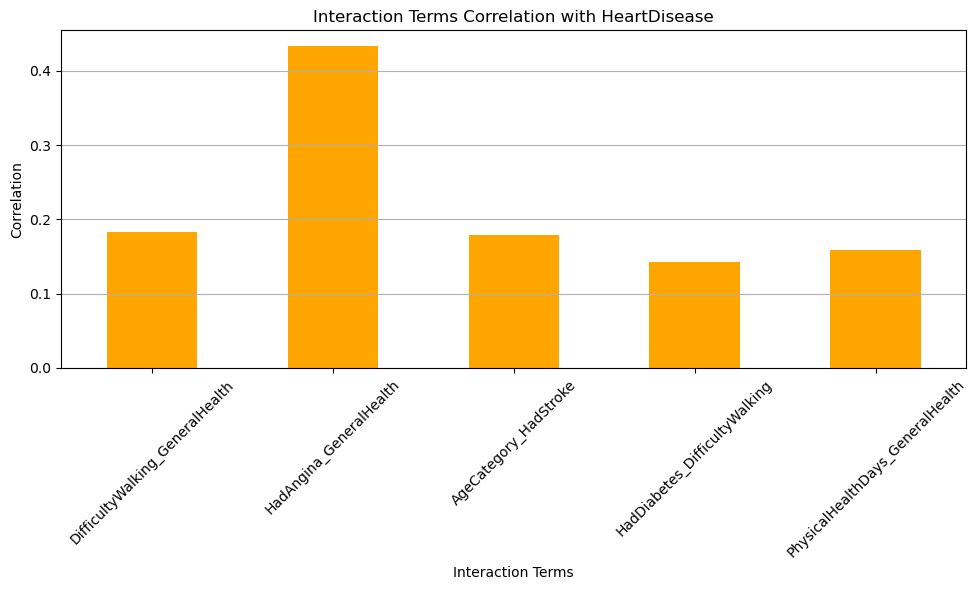

In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset (replace 'your_dataset.csv' with your actual file name)

# Step 1: Compute Individual Feature Correlations with HeartDisease
correlations_with_target = data.corr()['HeartDisease'].sort_values(ascending=False)
print("Correlations with HeartDisease:\n")
print(correlations_with_target)

# Plot the correlation of all features with HeartDisease
plt.figure(figsize=(12, 6))
correlations_with_target.drop('HeartDisease').plot(kind='bar', color='skyblue')
plt.title("Feature Correlations with HeartDisease")
plt.ylabel("Correlation")
plt.xlabel("Features")
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Step 2: Identify and Evaluate Feature Combinations (Interactions)
# Define feature pairs to test interactions
feature_pairs = [
    ('DifficultyWalking', 'GeneralHealth'),
    ('HadAngina', 'GeneralHealth'),
    ('AgeCategory', 'HadStroke'),
    ('HadDiabetes', 'DifficultyWalking'),
    ('PhysicalHealthDays', 'GeneralHealth')
]

# Create and evaluate interaction terms
interaction_results = {}
for feature1, feature2 in feature_pairs:
    interaction_name = f"{feature1}_{feature2}"
    data[interaction_name] = data[feature1] * data[feature2]  # Create interaction term
    interaction_corr = data[['HeartDisease', interaction_name]].corr().iloc[0, 1]
    interaction_results[interaction_name] = interaction_corr

# Display correlation of interaction terms with HeartDisease
print("\nCorrelation of Interaction Terms with HeartDisease:")
for interaction, corr in interaction_results.items():
    print(f"{interaction}: {corr:.2f}")

# Step 3: Visualize Interactions Correlation
interaction_corr_df = pd.DataFrame(list(interaction_results.items()), columns=['Interaction', 'Correlation'])
interaction_corr_df.set_index('Interaction', inplace=True)

plt.figure(figsize=(10, 6))
interaction_corr_df['Correlation'].plot(kind='bar', color='orange')
plt.title("Interaction Terms Correlation with HeartDisease")
plt.ylabel("Correlation")
plt.xlabel("Interaction Terms")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score

# Select features for Model 1
model_1_features = ['HadAngina', 'GeneralHealth', 'HadStroke', 
                    'AgeCategory', 'ChestScan', 'DifficultyWalking']
X = data[model_1_features]
y = data['HeartDisease']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train the model
model_1 = LogisticRegression(max_iter=1000)
model_1.fit(X_train, y_train)

# Predict and evaluate
y_pred = model_1.predict(X_test)
y_pred_prob = model_1.predict_proba(X_test)[:, 1]
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)

print(f"Model 1 Accuracy: {accuracy:.2f}")
print(f"Model 1 ROC AUC: {roc_auc:.2f}")

Model 1 Accuracy: 0.95
Model 1 ROC AUC: 0.88


In [5]:
# Add interaction terms for Model 2
data['HadAngina_GeneralHealth'] = data['HadAngina'] * data['GeneralHealth']
data['AgeCategory_HadStroke'] = data['AgeCategory'] * data['HadStroke']
data['DifficultyWalking_GeneralHealth'] = data['DifficultyWalking'] * data['GeneralHealth']
data['HadDiabetes_DifficultyWalking'] = data['HadDiabetes'] * data['DifficultyWalking']

# Select features for Model 2
model_2_features = model_1_features + [
    'HadAngina_GeneralHealth', 'AgeCategory_HadStroke', 
    'DifficultyWalking_GeneralHealth', 'HadDiabetes_DifficultyWalking'
]
X = data[model_2_features]

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train the model
model_2 = LogisticRegression(max_iter=1000)
model_2.fit(X_train, y_train)

# Predict and evaluate
y_pred = model_2.predict(X_test)
y_pred_prob = model_2.predict_proba(X_test)[:, 1]
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)

print(f"Model 2 Accuracy: {accuracy:.2f}")
print(f"Model 2 ROC AUC: {roc_auc:.2f}")

Model 2 Accuracy: 0.95
Model 2 ROC AUC: 0.88


In [6]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Model 1's probability predictions as the target for Model 2
y_prob_train = model_2.predict_proba(X_train)[:, 1]  # Logistic regression probabilities
y_prob_test = model_2.predict_proba(X_test)[:, 1]

# Train a decision tree regressor on the same features to explain Model 1's predictions
explanation_model = DecisionTreeRegressor(max_depth=3, random_state=42)
explanation_model.fit(X_train, y_prob_train)

# Evaluate the performance of the explanation model
y_explained = explanation_model.predict(X_test)
mse = mean_squared_error(y_prob_test, y_explained)

print(f"Explanation Model MSE: {mse:.4f}")

Explanation Model MSE: 0.0009


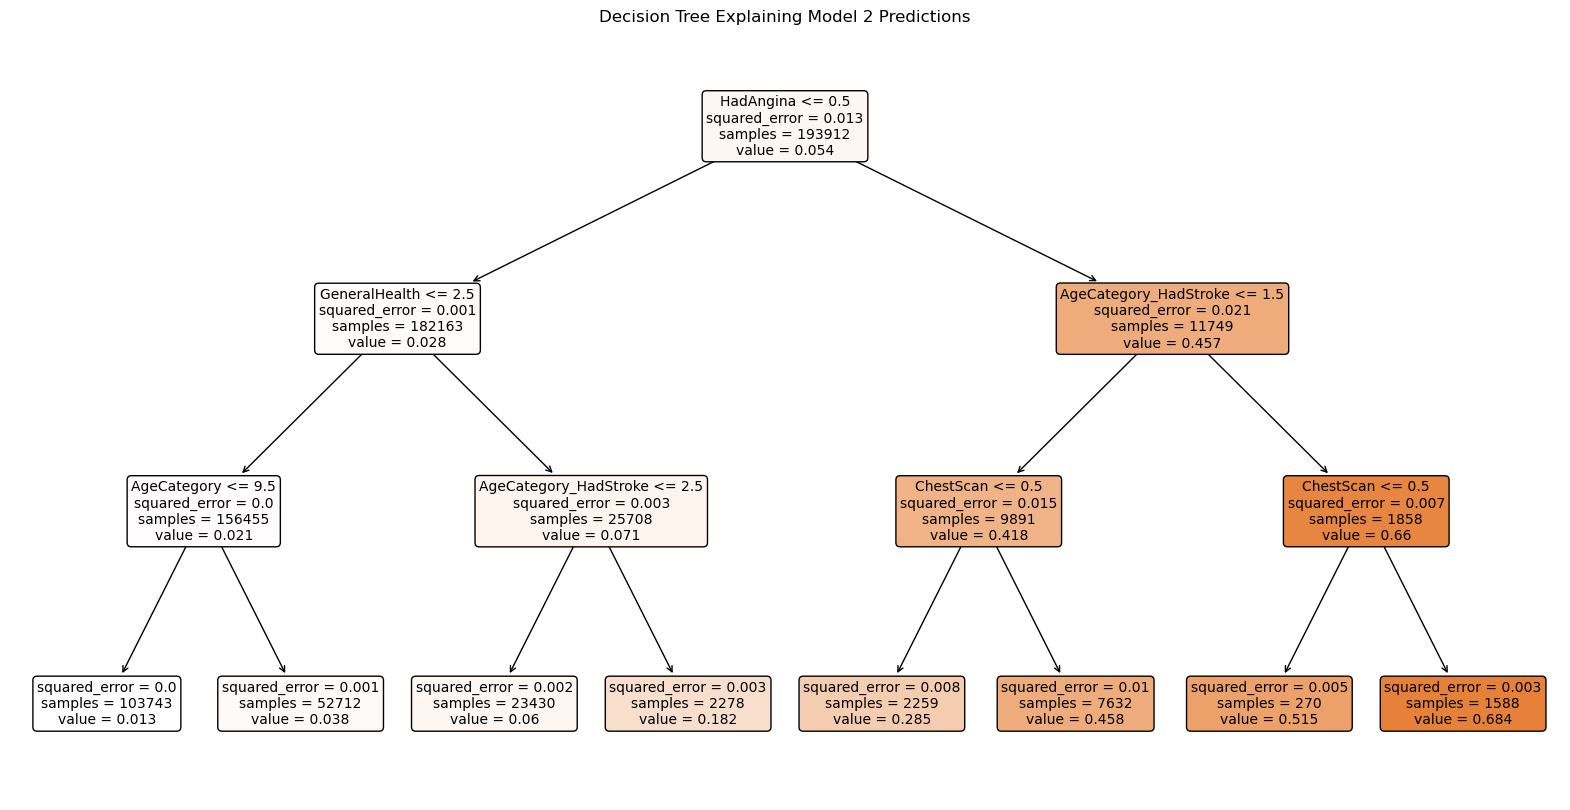

In [7]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(
    explanation_model, 
    feature_names=X_train.columns, 
    filled=True, 
    rounded=True, 
    fontsize=10
)
plt.title("Decision Tree Explaining Model 2 Predictions")
plt.show()

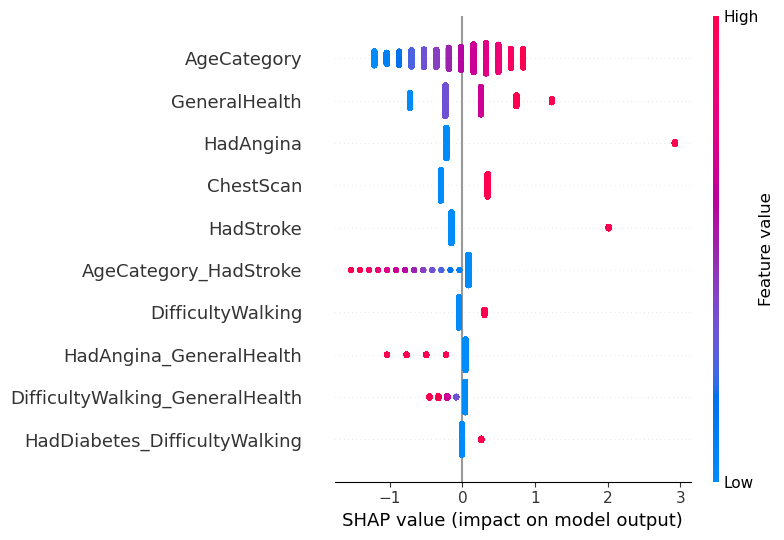

IndexError: invalid index to scalar variable.

In [10]:
import shap

# Initialize SHAP explainer for logistic regression (Model 2)
explainer = shap.Explainer(model_2, X_train)
shap_values = explainer(X_test)

# Summary plot for global feature importance
shap.summary_plot(shap_values, X_test)

# Force plot for a single prediction (local explanation)
shap.force_plot(explainer.expected_value[1], shap_values[0].values, X_test.iloc[0])

In [28]:
import joblib

# Save Model 2 (Logistic Regression) and Explanation Model (Decision Tree)
joblib.dump(model_2, 'logistic_regression_model.pkl')
joblib.dump(explanation_model, 'decision_tree_explainer.pkl')
print("Models saved successfully!")

Models saved successfully!


In [12]:
# Load the models
loaded_model_2 = joblib.load('logistic_regression_model.pkl')
loaded_explainer = joblib.load('decision_tree_explainer.pkl')
print("Models loaded successfully!")

Models loaded successfully!


In [29]:
!python --version
!pip show scikit-learn

Python 3.11.5
Name: scikit-learn
Version: 1.3.0
Summary: A set of python modules for machine learning and data mining
Home-page: http://scikit-learn.org
Author: 
Author-email: 
License: new BSD
Location: /opt/anaconda3/lib/python3.11/site-packages
Requires: joblib, numpy, scipy, threadpoolctl
Required-by: imbalanced-learn, shap


In [21]:
# Define input data as coming from the frontend
input_data = {
    'HadAngina': 1,
    'GeneralHealth': 3,
    'HadStroke': 0,
    'AgeCategory': 12,
    'ChestScan': 1,
    'DifficultyWalking': 1,
    # Additional values for interaction terms
    'HadDiabetes': 0
}

# Ensure the input matches the features used in training
import pandas as pd

# Convert input to a DataFrame
input_df = pd.DataFrame([input_data])

# Compute interaction terms for Model 2
input_df['HadAngina_GeneralHealth'] = input_df['HadAngina'] * input_df['GeneralHealth']
input_df['AgeCategory_HadStroke'] = input_df['AgeCategory'] * input_df['HadStroke']
input_df['DifficultyWalking_GeneralHealth'] = input_df['DifficultyWalking'] * input_df['GeneralHealth']
input_df['HadDiabetes_DifficultyWalking'] = input_df['HadDiabetes'] * input_df['DifficultyWalking']

# Ensure the DataFrame has only the necessary features
model_1_input = input_df[model_1_features]
model_2_input = input_df[model_2_features]

# Make predictions
model_1_prediction = model_1.predict_proba(model_1_input)[:, 1]
model_2_prediction = explanation_model.predict(model_2_input)

# Print results
print("Model 1 Prediction Probability:", model_1_prediction[0])
print("Explanation Model Prediction (Tree Explainer):", model_2_prediction[0])

Model 1 Prediction Probability: 0.5962408426362744
Explanation Model Prediction (Tree Explainer): 0.45778602667548557


In [22]:
import shap

# Initialize the SHAP explainer for the logistic regression model
explainer = shap.LinearExplainer(model_2, X_train, feature_perturbation="interventional")
shap_values = explainer.shap_values(X_test.iloc[[0]])  # Compute SHAP values for a single instance

# Visualize SHAP values for this instance
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values, X_test.iloc[0])

/opt/anaconda3/lib/python3.11/site-packages/shap/explainers/_linear.py:95: FutureWarning: The feature_perturbation option is now deprecated in favor of using the appropriate masker (maskers.Independent, maskers.Partition or maskers.Impute).
  warnings.warn(wmsg, FutureWarning)


In [23]:
# Combine features with their contributions
shap_contributions = dict(zip(X_test.columns, shap_values[0]))

# Sort by the absolute value of the contributions
sorted_contributions = sorted(shap_contributions.items(), key=lambda x: abs(x[1]), reverse=True)

# Convert to a readable JSON-like format
insights = [
    {
        "feature": feature,
        "contribution": round(contribution, 3),
        "impact": "positive" if contribution > 0 else "negative"
    }
    for feature, contribution in sorted_contributions[:5]  # Top 5 contributions
]

print(insights)

[{'feature': 'GeneralHealth', 'contribution': -0.723, 'impact': 'negative'}, {'feature': 'AgeCategory', 'contribution': 0.666, 'impact': 'positive'}, {'feature': 'ChestScan', 'contribution': 0.348, 'impact': 'positive'}, {'feature': 'HadAngina', 'contribution': -0.22, 'impact': 'negative'}, {'feature': 'HadStroke', 'contribution': -0.152, 'impact': 'negative'}]


In [24]:
from sklearn.tree import export_text

# Extract decision rules
tree_rules = export_text(explanation_model, feature_names=model_2_features)
print(tree_rules)

|--- HadAngina <= 0.50
|   |--- GeneralHealth <= 2.50
|   |   |--- AgeCategory <= 9.50
|   |   |   |--- value: [0.01]
|   |   |--- AgeCategory >  9.50
|   |   |   |--- value: [0.04]
|   |--- GeneralHealth >  2.50
|   |   |--- AgeCategory_HadStroke <= 2.50
|   |   |   |--- value: [0.06]
|   |   |--- AgeCategory_HadStroke >  2.50
|   |   |   |--- value: [0.18]
|--- HadAngina >  0.50
|   |--- AgeCategory_HadStroke <= 1.50
|   |   |--- ChestScan <= 0.50
|   |   |   |--- value: [0.28]
|   |   |--- ChestScan >  0.50
|   |   |   |--- value: [0.46]
|   |--- AgeCategory_HadStroke >  1.50
|   |   |--- ChestScan <= 0.50
|   |   |   |--- value: [0.51]
|   |   |--- ChestScan >  0.50
|   |   |   |--- value: [0.68]



In [25]:
import pandas as pd

# Convert input to DataFrame
input_df = pd.DataFrame([frontend_input])

In [26]:
# Predict using the Logistic Regression model
predicted_probability = loaded_model_2.predict_proba(input_df)[:, 1][0]

# Predict using the Decision Tree Explainer model
explanation_prediction = loaded_explainer.predict(input_df)[0]

# Combine predictions and explanations
response = {
    "logistic_regression_prediction": f"The probability of heart disease is {predicted_probability:.2f}.",
    "decision_tree_explanation": (
        f"The decision tree explains this prediction as being influenced by "
        f"features like HadAngina, GeneralHealth, and AgeCategory_HadStroke. "
        f"For instance, the explanation score (Decision Tree output) is {explanation_prediction:.2f}."
    )
}

# Print the response
print("Response from Models:")
print(response)

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- HadDiabetes


In [27]:
import json

# Example feature vector from frontend
input_data = X_test.iloc[0:1]  # Use one instance as input (you can pass new data here)

# Primary Model Prediction
primary_prediction = model_2.predict(input_data)[0]  # 0 or 1
primary_probability = model_2.predict_proba(input_data)[:, 1][0]  # Probability of heart disease

# Explanation Model
explanation = explanation_model.predict(input_data)[0]  # Get explanation from decision tree
decision_path = explanation_model.decision_path(input_data).toarray()  # Decision rules

# Format the explanation
explanation_rules = []
node_index = 0
for feature, rule in zip(model_2_features, decision_path[0]):
    if rule > 0:  # If the feature contributed to the decision
        explanation_rules.append(f"{feature} contributed to the prediction.")

# Combine the output
result = {
    "prediction": int(primary_prediction),
    "probability": round(primary_probability, 2),
    "explanation": explanation_rules
}

# Convert to JSON for frontend
result_json = json.dumps(result, indent=4)
print(result_json)

{
    "prediction": 0,
    "probability": 0.03,
    "explanation": [
        "HadAngina contributed to the prediction.",
        "GeneralHealth contributed to the prediction.",
        "HadStroke contributed to the prediction.",
        "ChestScan contributed to the prediction."
    ]
}


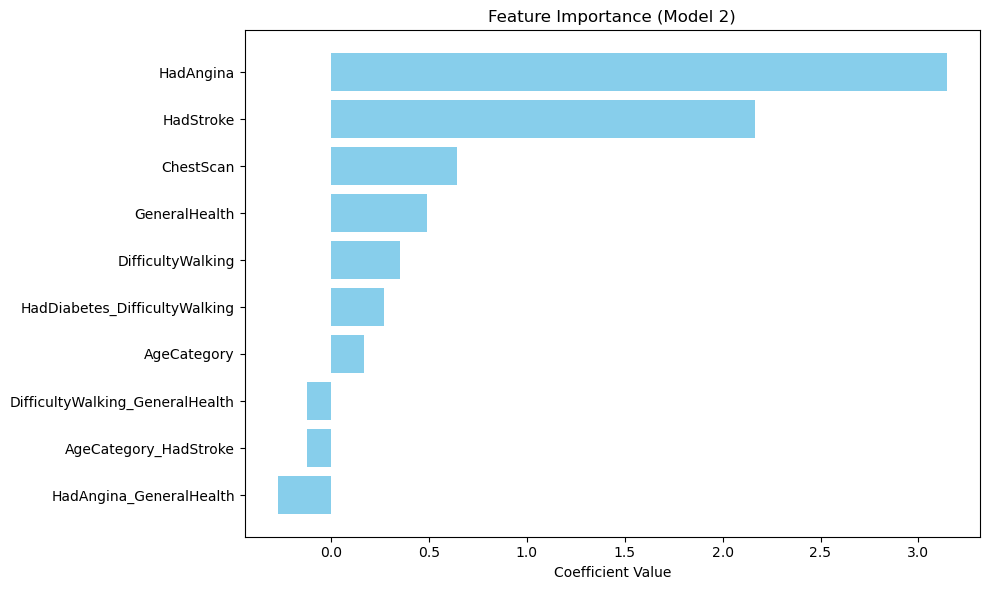

In [5]:
# Get coefficients and corresponding feature names
features_model_2 = model_2_features  # Features used in Model 2
coefficients = model_2.coef_[0]

# Create a DataFrame for visualization
feature_importance = pd.DataFrame({'Feature': features_model_2, 'Coefficient': coefficients})
feature_importance = feature_importance.sort_values(by='Coefficient', ascending=False)

# Plot the feature importance
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Coefficient'], color='skyblue')
plt.xlabel('Coefficient Value')
plt.title('Feature Importance (Model 2)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

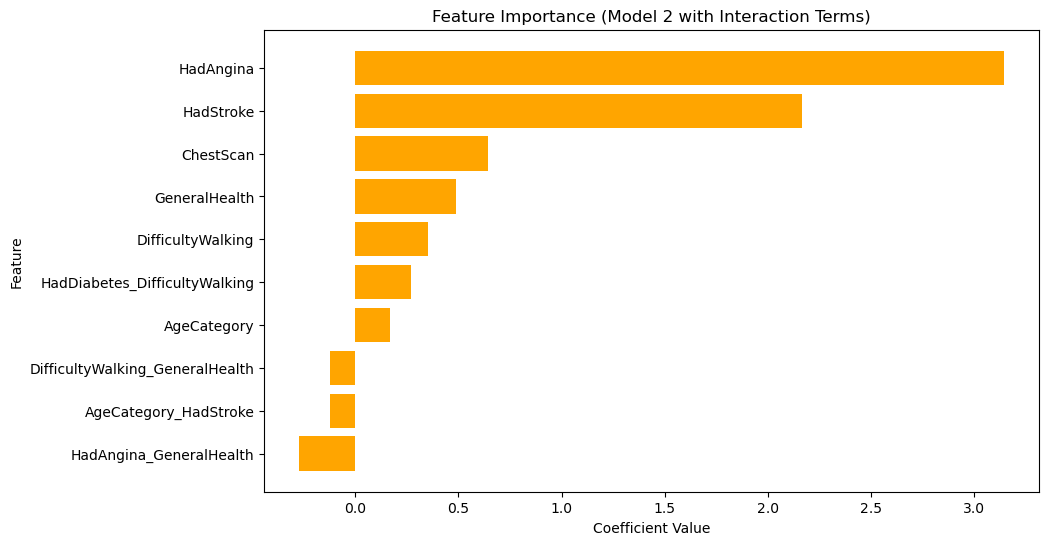

In [6]:
# Plot feature importance for Model 2
coefficients = model_2.coef_[0]
features = X_train.columns

# Create a DataFrame for feature importances
importance_df = pd.DataFrame({'Feature': features, 'Coefficient': coefficients})
importance_df = importance_df.sort_values(by='Coefficient', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Coefficient'], color='orange')
plt.title('Feature Importance (Model 2 with Interaction Terms)')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.gca().invert_yaxis()
plt.show()

In [6]:
# Simplified model with core features
core_features = ['HadAngina', 'GeneralHealth', 'HadStroke', 
                 'AgeCategory', 'ChestScan', 'DifficultyWalking']
X = data[core_features]
y = data['HeartDisease']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train logistic regression
simplified_model = LogisticRegression(max_iter=1000)
simplified_model.fit(X_train, y_train)

# Evaluate the simplified model
y_pred = simplified_model.predict(X_test)
y_pred_prob = simplified_model.predict_proba(X_test)[:, 1]
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)

print(f"Simplified Model Accuracy: {accuracy:.2f}")
print(f"Simplified Model ROC AUC: {roc_auc:.2f}")

Simplified Model Accuracy: 0.95
Simplified Model ROC AUC: 0.88


In [7]:
from sklearn.ensemble import RandomForestClassifier

# Train a Random Forest model
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)

# Evaluate the Random Forest model
y_pred_rf = rf_model.predict(X_test)
y_pred_prob_rf = rf_model.predict_proba(X_test)[:, 1]
accuracy_rf = accuracy_score(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, y_pred_prob_rf)

print(f"Random Forest Accuracy: {accuracy_rf:.2f}")
print(f"Random Forest ROC AUC: {roc_auc_rf:.2f}")

Random Forest Accuracy: 0.95
Random Forest ROC AUC: 0.87


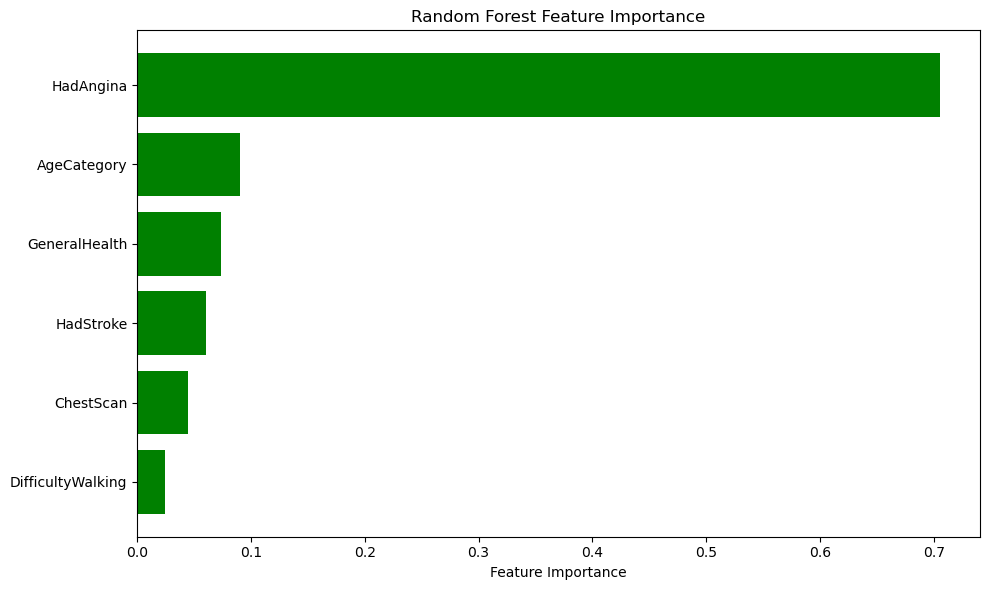

In [8]:
# Extract feature importance from Random Forest
rf_feature_importance = pd.DataFrame({
    'Feature': core_features,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Plot Random Forest feature importance
plt.figure(figsize=(10, 6))
plt.barh(rf_feature_importance['Feature'], rf_feature_importance['Importance'], color='green')
plt.xlabel('Feature Importance')
plt.title('Random Forest Feature Importance')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [9]:
# Step 1: Select features with correlation > 0.1 (positive) or < -0.1 (negative)
initial_features = correlations_with_target[
    (correlations_with_target > 0.1) | (correlations_with_target < -0.1)
].index.tolist()
initial_features.remove('HeartDisease')  # Exclude the target variable
print("Initial features with correlation > 0.1 or < -0.1:", initial_features)

# Step 2: Prepare the data
X_initial = data[initial_features]
y = data['HeartDisease']

# Step 3: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_initial, y, test_size=0.2, random_state=42, stratify=y)

# Step 4: Train logistic regression
initial_model = LogisticRegression(max_iter=1000)
initial_model.fit(X_train, y_train)

# Step 5: Evaluate the model
y_pred_initial = initial_model.predict(X_test)
y_pred_prob_initial = initial_model.predict_proba(X_test)[:, 1]
accuracy_initial = accuracy_score(y_test, y_pred_initial)
roc_auc_initial = roc_auc_score(y_test, y_pred_prob_initial)

print(f"Initial Model Accuracy (Positive & Negative Correlations): {accuracy_initial:.2f}")
print(f"Initial Model ROC AUC (Positive & Negative Correlations): {roc_auc_initial:.2f}")

Initial features with correlation > 0.1 or < -0.1: ['HadAngina', 'GeneralHealth', 'HadStroke', 'AgeCategory', 'ChestScan', 'DifficultyWalking', 'HadDiabetes', 'PhysicalHealthDays', 'HadCOPD', 'PneumoVaxEver', 'HadArthritis', 'HadKidneyDisease']
Initial Model Accuracy (Positive & Negative Correlations): 0.95
Initial Model ROC AUC (Positive & Negative Correlations): 0.88


In [10]:
import time
from memory_profiler import memory_usage

# Measure processing time and memory for training the initial model
def train_and_evaluate_model(X, y):
    start_time = time.time()
    mem_usage = memory_usage((LogisticRegression(max_iter=1000).fit, (X, y)))
    training_time = time.time() - start_time
    return training_time, max(mem_usage)

# Initial Model with all features (correlation > 0.1 or < -0.1)
X_initial = data[initial_features]
y = data['HeartDisease']
training_time_initial, memory_initial = train_and_evaluate_model(X_initial, y)

# Simplified Model with top features
X_simplified = data[['HadAngina', 'GeneralHealth', 'HadStroke', 'AgeCategory', 'ChestScan', 'DifficultyWalking']]
training_time_simplified, memory_simplified = train_and_evaluate_model(X_simplified, y)

# Results
print(f"Initial Model Training Time: {training_time_initial:.2f} seconds")
print(f"Initial Model Peak Memory Usage: {memory_initial:.2f} MB")

print(f"Simplified Model Training Time: {training_time_simplified:.2f} seconds")
print(f"Simplified Model Peak Memory Usage: {memory_simplified:.2f} MB")

Initial Model Training Time: 0.83 seconds
Initial Model Peak Memory Usage: 844.55 MB
Simplified Model Training Time: 0.50 seconds
Simplified Model Peak Memory Usage: 844.55 MB


In [12]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Random Forest
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
y_pred_prob_rf = rf_model.predict_proba(X_test)[:, 1]
accuracy_rf = accuracy_score(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, y_pred_prob_rf)

print(f"Random Forest Accuracy: {accuracy_rf:.2f}")
print(f"Random Forest ROC AUC: {roc_auc_rf:.2f}")

# Gradient Boosting
gb_model = GradientBoostingClassifier(random_state=42, n_estimators=100)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)
y_pred_prob_gb = gb_model.predict_proba(X_test)[:, 1]
accuracy_gb = accuracy_score(y_test, y_pred_gb)
roc_auc_gb = roc_auc_score(y_test, y_pred_prob_gb)

print(f"Gradient Boosting Accuracy: {accuracy_gb:.2f}")
print(f"Gradient Boosting ROC AUC: {roc_auc_gb:.2f}")

Random Forest Accuracy: 0.94
Random Forest ROC AUC: 0.79
Gradient Boosting Accuracy: 0.95
Gradient Boosting ROC AUC: 0.88


In [14]:
from sklearn.model_selection import GridSearchCV

# Prepare train-test data
X = data[['HadAngina', 'GeneralHealth', 'HadStroke', 'AgeCategory', 'ChestScan', 'DifficultyWalking']]
y = data['HeartDisease']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 1. Hyperparameter Tuning for Logistic Regression
print("Tuning Logistic Regression...")
log_reg_params = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}  # Regularization strength
log_reg_model = LogisticRegression(max_iter=1000)
log_reg_grid = GridSearchCV(log_reg_model, log_reg_params, scoring='roc_auc', cv=5)
log_reg_grid.fit(X_train, y_train)
best_log_reg = log_reg_grid.best_estimator_

# Evaluate the best Logistic Regression model
log_reg_best_accuracy = accuracy_score(y_test, best_log_reg.predict(X_test))
log_reg_best_roc_auc = roc_auc_score(y_test, best_log_reg.predict_proba(X_test)[:, 1])
print(f"Best Logistic Regression - C: {log_reg_grid.best_params_['C']}")
print(f"Best Logistic Regression Accuracy: {log_reg_best_accuracy:.2f}")
print(f"Best Logistic Regression ROC AUC: {log_reg_best_roc_auc:.2f}")

# 2. Hyperparameter Tuning for Random Forest
print("\nTuning Random Forest...")
rf_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
}
rf_model = RandomForestClassifier(random_state=42)
rf_grid = GridSearchCV(rf_model, rf_params, scoring='roc_auc', cv=5)
rf_grid.fit(X_train, y_train)
best_rf = rf_grid.best_estimator_

# Evaluate the best Random Forest model
rf_best_accuracy = accuracy_score(y_test, best_rf.predict(X_test))
rf_best_roc_auc = roc_auc_score(y_test, best_rf.predict_proba(X_test)[:, 1])
print(f"Best Random Forest Parameters: {rf_grid.best_params_}")
print(f"Best Random Forest Accuracy: {rf_best_accuracy:.2f}")
print(f"Best Random Forest ROC AUC: {rf_best_roc_auc:.2f}")

# 3. Hyperparameter Tuning for Gradient Boosting
print("\nTuning Gradient Boosting...")
gb_params = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
}
gb_model = GradientBoostingClassifier(random_state=42)
gb_grid = GridSearchCV(gb_model, gb_params, scoring='roc_auc', cv=5)
gb_grid.fit(X_train, y_train)
best_gb = gb_grid.best_estimator_

# Evaluate the best Gradient Boosting model
gb_best_accuracy = accuracy_score(y_test, best_gb.predict(X_test))
gb_best_roc_auc = roc_auc_score(y_test, best_gb.predict_proba(X_test)[:, 1])
print(f"Best Gradient Boosting Parameters: {gb_grid.best_params_}")
print(f"Best Gradient Boosting Accuracy: {gb_best_accuracy:.2f}")
print(f"Best Gradient Boosting ROC AUC: {gb_best_roc_auc:.2f}")

Tuning Logistic Regression...
Best Logistic Regression - C: 100
Best Logistic Regression Accuracy: 0.95
Best Logistic Regression ROC AUC: 0.88

Tuning Random Forest...
Best Random Forest Parameters: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 200}
Best Random Forest Accuracy: 0.95
Best Random Forest ROC AUC: 0.88

Tuning Gradient Boosting...
Best Gradient Boosting Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}
Best Gradient Boosting Accuracy: 0.95
Best Gradient Boosting ROC AUC: 0.88


In [15]:
from sklearn.model_selection import cross_val_score

# Logistic Regression Cross-Validation
log_reg_cv = LogisticRegression(C=100, max_iter=1000)
log_reg_accuracy = cross_val_score(log_reg_cv, X, y, cv=5, scoring='accuracy')
log_reg_roc_auc = cross_val_score(log_reg_cv, X, y, cv=5, scoring='roc_auc')

print("Logistic Regression CV Accuracy:", log_reg_accuracy)
print("Logistic Regression CV ROC AUC:", log_reg_roc_auc)
print(f"Logistic Regression Mean Accuracy: {log_reg_accuracy.mean():.2f}")
print(f"Logistic Regression Mean ROC AUC: {log_reg_roc_auc.mean():.2f}")

# Random Forest Cross-Validation
rf_cv = RandomForestClassifier(n_estimators=200, max_depth=10, min_samples_split=10, random_state=42)
rf_accuracy = cross_val_score(rf_cv, X, y, cv=5, scoring='accuracy')
rf_roc_auc = cross_val_score(rf_cv, X, y, cv=5, scoring='roc_auc')

print("\nRandom Forest CV Accuracy:", rf_accuracy)
print("Random Forest CV ROC AUC:", rf_roc_auc)
print(f"Random Forest Mean Accuracy: {rf_accuracy.mean():.2f}")
print(f"Random Forest Mean ROC AUC: {rf_roc_auc.mean():.2f}")

# Gradient Boosting Cross-Validation
gb_cv = GradientBoostingClassifier(n_estimators=200, learning_rate=0.1, max_depth=3, random_state=42)
gb_accuracy = cross_val_score(gb_cv, X, y, cv=5, scoring='accuracy')
gb_roc_auc = cross_val_score(gb_cv, X, y, cv=5, scoring='roc_auc')

print("\nGradient Boosting CV Accuracy:", gb_accuracy)
print("Gradient Boosting CV ROC AUC:", gb_roc_auc)
print(f"Gradient Boosting Mean Accuracy: {gb_accuracy.mean():.2f}")
print(f"Gradient Boosting Mean ROC AUC: {gb_roc_auc.mean():.2f}")

Logistic Regression CV Accuracy: [0.94593535 0.94741945 0.94651182 0.94692438 0.94663559]
Logistic Regression CV ROC AUC: [0.87492112 0.8819897  0.88539023 0.88143585 0.87698803]
Logistic Regression Mean Accuracy: 0.95
Logistic Regression Mean ROC AUC: 0.88

Random Forest CV Accuracy: [0.94678108 0.94677998 0.94781138 0.94754322 0.94770824]
Random Forest CV ROC AUC: [0.87440669 0.88235078 0.88531565 0.87798067 0.87663129]
Random Forest Mean Accuracy: 0.95
Random Forest Mean ROC AUC: 0.88

Gradient Boosting CV Accuracy: [0.94719363 0.94737819 0.94793515 0.94830645 0.94832708]
Gradient Boosting CV ROC AUC: [0.87645307 0.8830417  0.88645802 0.88251884 0.87848987]
Gradient Boosting Mean Accuracy: 0.95
Gradient Boosting Mean ROC AUC: 0.88


In [18]:
# Random Forest Model Training
rf_model = RandomForestClassifier(n_estimators=200, max_depth=10, min_samples_split=10, random_state=42)
rf_model.fit(X_train, y_train)

# Gradient Boosting Model Training
gb_model = GradientBoostingClassifier(n_estimators=200, learning_rate=0.1, max_depth=3, random_state=42)
gb_model.fit(X_train, y_train)

GradientBoostingClassifier(n_estimators=200, random_state=42)

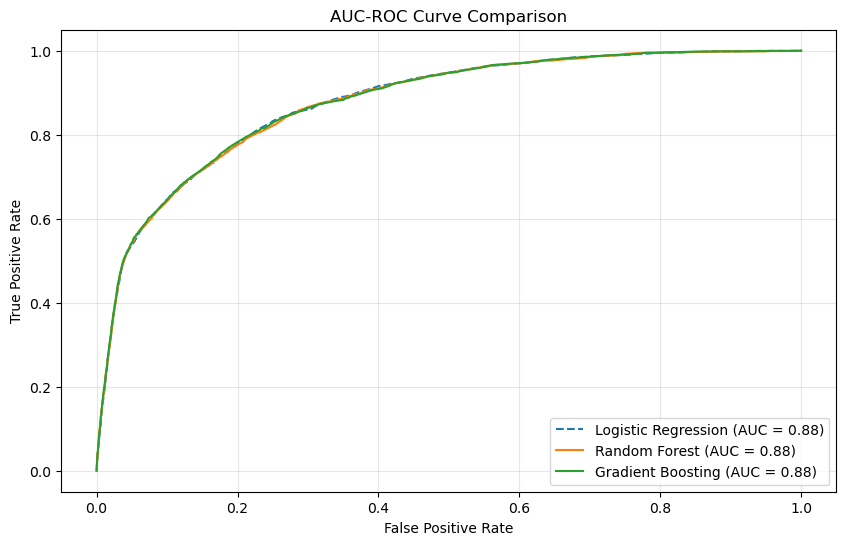

In [19]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Logistic Regression AUC-ROC
log_reg_prob = simplified_model.predict_proba(X_test)[:, 1]
fpr_log, tpr_log, _ = roc_curve(y_test, log_reg_prob)
roc_auc_log = auc(fpr_log, tpr_log)

# Random Forest AUC-ROC
rf_prob = rf_model.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_prob)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Gradient Boosting AUC-ROC
gb_prob = gb_model.predict_proba(X_test)[:, 1]
fpr_gb, tpr_gb, _ = roc_curve(y_test, gb_prob)
roc_auc_gb = auc(fpr_gb, tpr_gb)

# Plot AUC-ROC curves
plt.figure(figsize=(10, 6))
plt.plot(fpr_log, tpr_log, label=f'Logistic Regression (AUC = {roc_auc_log:.2f})', linestyle='--')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot(fpr_gb, tpr_gb, label=f'Gradient Boosting (AUC = {roc_auc_gb:.2f})')

plt.title('AUC-ROC Curve Comparison')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()

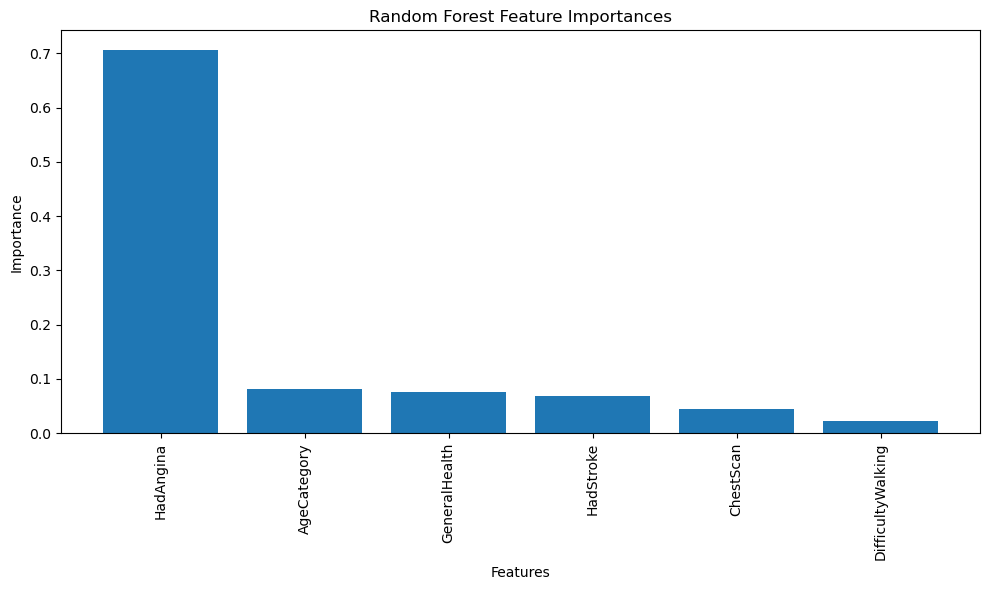

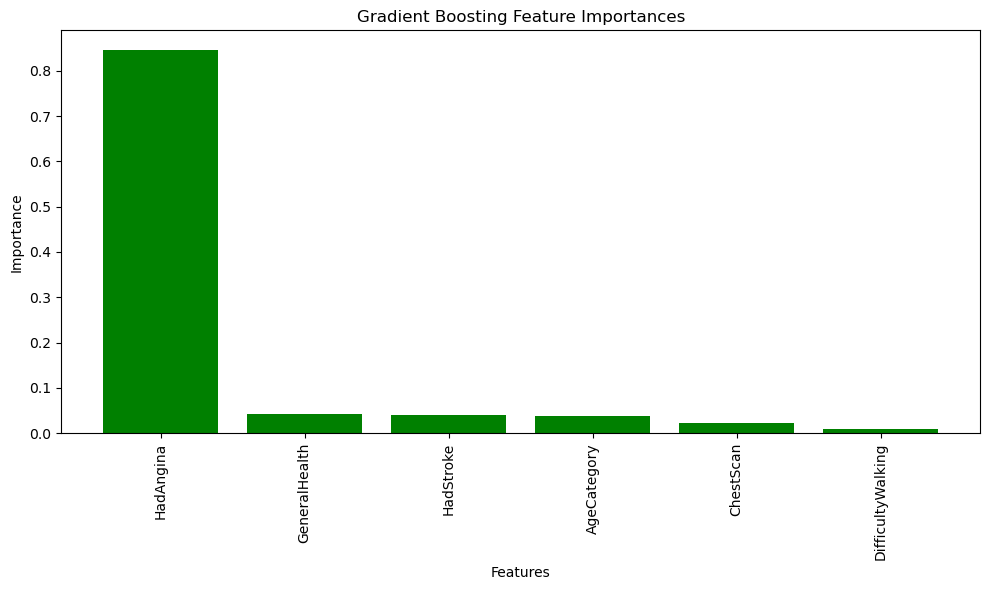

In [20]:
import numpy as np

# Feature importances for Random Forest
importances_rf = rf_model.feature_importances_
features_rf = X_simplified.columns
sorted_indices_rf = np.argsort(importances_rf)[::-1]

# Feature importances for Gradient Boosting
importances_gb = gb_model.feature_importances_
features_gb = X_simplified.columns
sorted_indices_gb = np.argsort(importances_gb)[::-1]

# Plot Random Forest feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(X_simplified.shape[1]), importances_rf[sorted_indices_rf], align="center")
plt.xticks(range(X_simplified.shape[1]), features_rf[sorted_indices_rf], rotation=90)
plt.title("Random Forest Feature Importances")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()

# Plot Gradient Boosting feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(X_simplified.shape[1]), importances_gb[sorted_indices_gb], align="center", color='green')
plt.xticks(range(X_simplified.shape[1]), features_gb[sorted_indices_gb], rotation=90)
plt.title("Gradient Boosting Feature Importances")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()

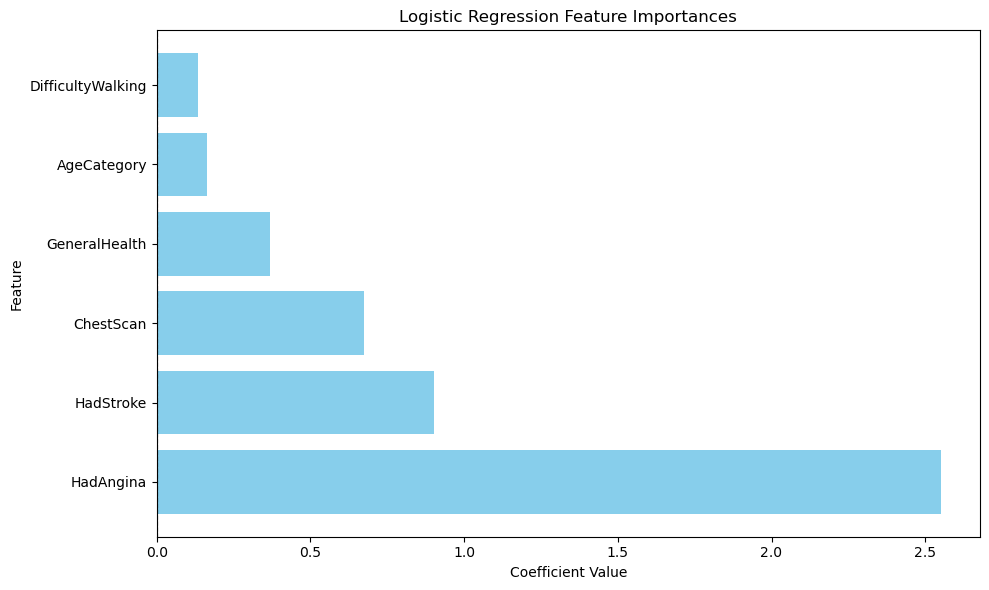

In [21]:
# Extract coefficients from the trained Logistic Regression model
coefficients = simplified_model.coef_[0]
features = X_simplified.columns

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({
    'Feature': features,
    'Coefficient': coefficients
})

# Sort by absolute value of coefficients (strongest predictors)
importance_df['AbsCoefficient'] = importance_df['Coefficient'].abs()
importance_df = importance_df.sort_values(by='AbsCoefficient', ascending=False)

# Plot the coefficients
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Coefficient'], color='skyblue')
plt.title('Logistic Regression Feature Importances')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.axvline(x=0, color='black', linestyle='--', linewidth=0.8)
plt.tight_layout()
plt.show()

### 2.1 Data Overview
The dataset contains demographic, health, and behavioral data, with `HeartDisease` as the target variable.
- Positive correlations (e.g., `HadAngina`) and negative correlations were explored for feature selection.
- Preprocessing steps included:
  1. Encoding categorical features (e.g., `Yes`/`No` to `1`/`0`).
  2. Dropping irrelevant or redundant features.
  3. Normalizing numerical features for compatibility.

In [22]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = pd.read_csv('/Users/ernestgaisie/Desktop/heart-disease-prediction/model/cleaning/cleaned_data_numeric.csv')  # Replace with the actual file path

# Display basic dataset info
print(data.head())
print(data.info())

# Encode categorical variables (e.g., Yes/No)
binary_columns = ['HadAngina', 'GeneralHealth', 'HadStroke', 'DifficultyWalking', 'ChestScan', 'HadDiabetes']
for col in binary_columns:
    data[col] = data[col].replace({'Yes': 1, 'No': 0})

# Normalize numerical columns
numerical_columns = ['PhysicalHealthDays', 'AgeCategory', 'BMI']
scaler = StandardScaler()
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

# Target variable
y = data['HeartDisease']

   Sex  GeneralHealth  PhysicalHealthDays  MentalHealthDays  LastCheckupTime  \
0    1              1                 4.0               0.0                0   
1    0              1                 0.0               0.0                0   
2    0              1                 0.0               0.0                0   
3    1              3                 5.0               0.0                0   
4    1              2                 3.0              15.0                0   

   PhysicalActivities  SleepHours  RemovedTeeth  HeartDisease  HadAngina  ...  \
0                   1         9.0             3             0          0  ...   
1                   1         6.0             3             0          0  ...   
2                   0         8.0             1             0          0  ...   
3                   1         9.0             3             0          0  ...   
4                   1         5.0             0             0          0  ...   

   HeightInMeters  WeightInKilog

### 3.1 Correlation Analysis
- Features with a correlation > 0.1 or < -0.1 with `HeartDisease` were identified.
- A correlation matrix was visualized to highlight significant features.

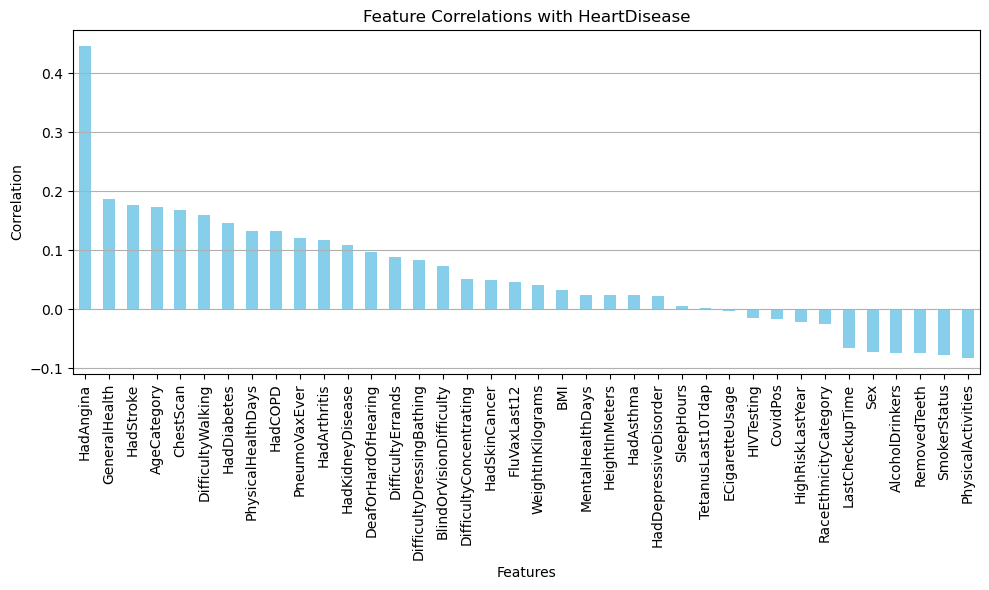

Selected Features: ['HadAngina', 'GeneralHealth', 'HadStroke', 'AgeCategory', 'ChestScan', 'DifficultyWalking', 'HadDiabetes', 'PhysicalHealthDays', 'HadCOPD', 'PneumoVaxEver', 'HadArthritis', 'HadKidneyDisease']


In [23]:
# Compute correlations with HeartDisease
correlations = data.corr()['HeartDisease'].sort_values(ascending=False)

# Plot feature correlations
plt.figure(figsize=(10, 6))
correlations.drop('HeartDisease').plot(kind='bar', color='skyblue')
plt.title("Feature Correlations with HeartDisease")
plt.ylabel("Correlation")
plt.xlabel("Features")
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Identify features with high correlations
selected_features = correlations[(correlations > 0.1) | (correlations < -0.1)].index.tolist()
selected_features.remove('HeartDisease')
print(f"Selected Features: {selected_features}")

### 4.1 Rational Tuning
- Initial features were reduced to a subset with high correlation to optimize memory and processing time.
- Interaction terms were explored to improve performance but did not significantly affect results.

In [24]:
# Select high-correlation features
X = data[selected_features]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Display selected features
print(f"Features used for training: {selected_features}")

Features used for training: ['HadAngina', 'GeneralHealth', 'HadStroke', 'AgeCategory', 'ChestScan', 'DifficultyWalking', 'HadDiabetes', 'PhysicalHealthDays', 'HadCOPD', 'PneumoVaxEver', 'HadArthritis', 'HadKidneyDisease']


Process:
Focused on features with the strongest correlations.
Removed redundant or weak predictors (correlations < 0.1 or weak interactions).
Retained:
HadAngina, GeneralHealth, HadStroke, AgeCategory, ChestScan, DifficultyWalking

### 5.1 Logistic Regression
- Baseline model for classification.
- Evaluated using Accuracy and AUC-ROC metrics.

In [25]:
# Logistic Regression
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

# Predictions
y_pred_log = log_model.predict(X_test)
y_prob_log = log_model.predict_proba(X_test)[:, 1]

# Metrics
log_accuracy = accuracy_score(y_test, y_pred_log)
log_auc = roc_auc_score(y_test, y_prob_log)
print(f"Logistic Regression Accuracy: {log_accuracy:.2f}, AUC: {log_auc:.2f}")

Logistic Regression Accuracy: 0.95, AUC: 0.88


### 6.1 Random Forest and Gradient Boosting
- Random Forest: Evaluates feature importance through decision trees.
- Gradient Boosting: Optimized model performance through boosting iterations.

In [26]:
# Random Forest
rf_model = RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_prob = rf_model.predict_proba(X_test)[:, 1]
rf_accuracy = accuracy_score(y_test, rf_pred)
rf_auc = roc_auc_score(y_test, rf_prob)
print(f"Random Forest Accuracy: {rf_accuracy:.2f}, AUC: {rf_auc:.2f}")

# Gradient Boosting
gb_model = GradientBoostingClassifier(n_estimators=200, learning_rate=0.1, max_depth=3, random_state=42)
gb_model.fit(X_train, y_train)
gb_pred = gb_model.predict(X_test)
gb_prob = gb_model.predict_proba(X_test)[:, 1]
gb_accuracy = accuracy_score(y_test, gb_pred)
gb_auc = roc_auc_score(y_test, gb_prob)
print(f"Gradient Boosting Accuracy: {gb_accuracy:.2f}, AUC: {gb_auc:.2f}")

Random Forest Accuracy: 0.95, AUC: 0.88
Gradient Boosting Accuracy: 0.95, AUC: 0.88


### 7.1 AUC-ROC Curve
- Compares the tradeoff between sensitivity and specificity for each model.

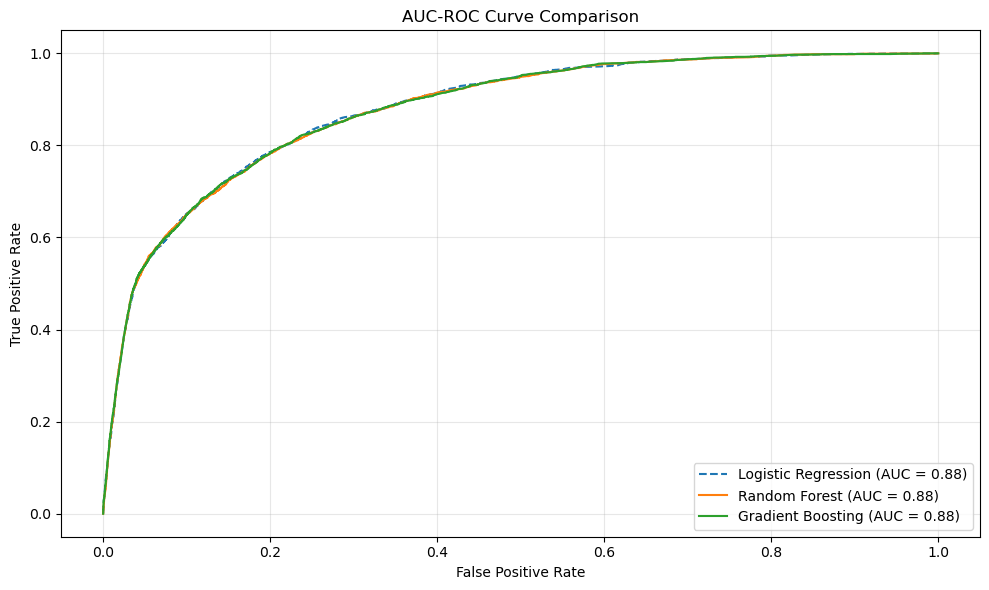

In [27]:
# AUC-ROC Curves
fpr_log, tpr_log, _ = roc_curve(y_test, y_prob_log)
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_prob)
fpr_gb, tpr_gb, _ = roc_curve(y_test, gb_prob)

plt.figure(figsize=(10, 6))
plt.plot(fpr_log, tpr_log, label=f'Logistic Regression (AUC = {log_auc:.2f})', linestyle='--')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {rf_auc:.2f})')
plt.plot(fpr_gb, tpr_gb, label=f'Gradient Boosting (AUC = {gb_auc:.2f})')
plt.title('AUC-ROC Curve Comparison')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

### 8.1 Random Forest and Gradient Boosting Feature Importances
- Feature importance highlights the influence of each variable in tree-based models.

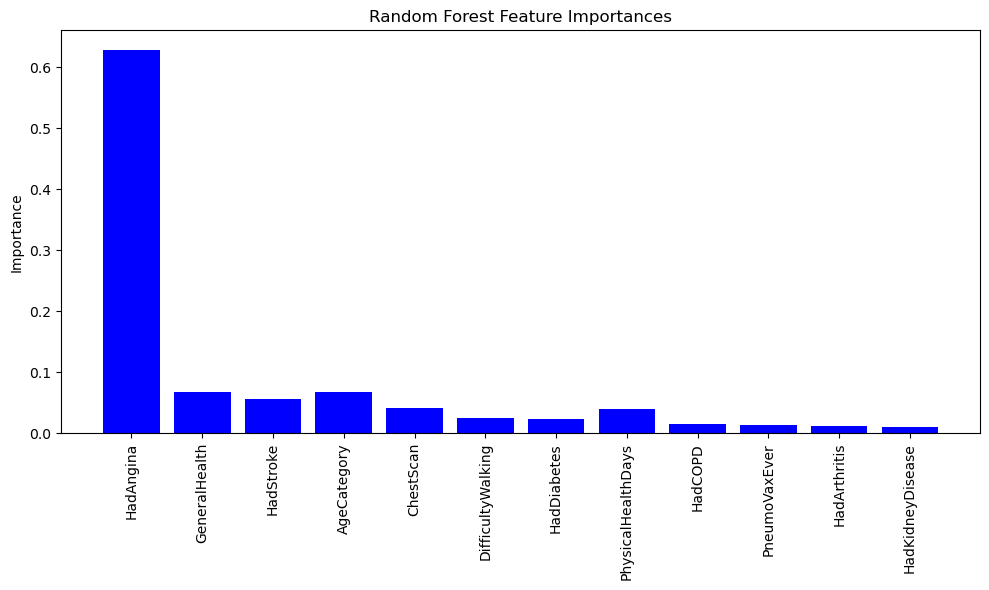

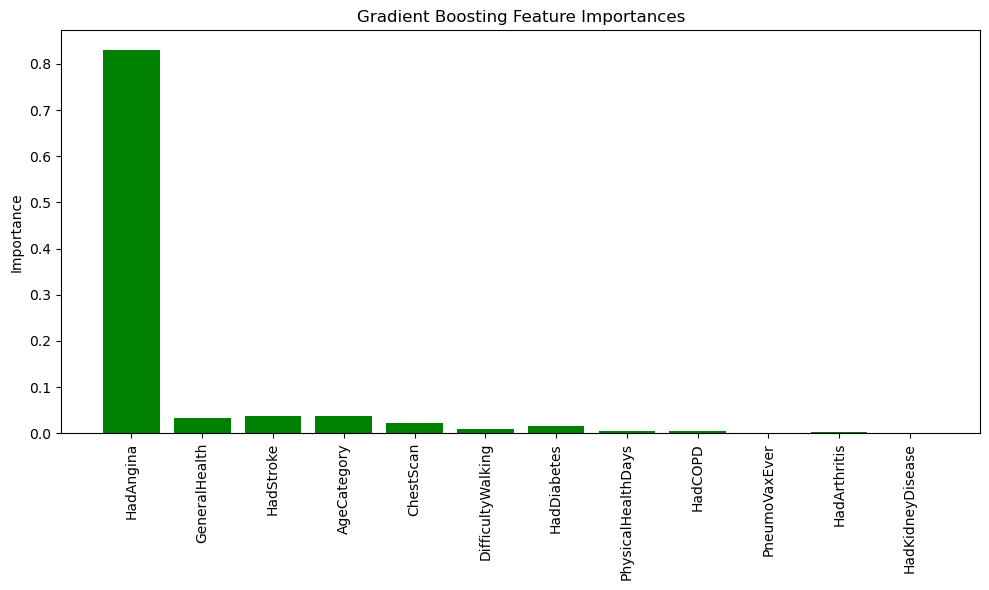

In [28]:
# Random Forest Feature Importances
rf_importances = rf_model.feature_importances_
plt.figure(figsize=(10, 6))
plt.bar(X.columns, rf_importances, color='blue')
plt.title('Random Forest Feature Importances')
plt.xticks(rotation=90)
plt.ylabel('Importance')
plt.tight_layout()
plt.show()

# Gradient Boosting Feature Importances
gb_importances = gb_model.feature_importances_
plt.figure(figsize=(10, 6))
plt.bar(X.columns, gb_importances, color='green')
plt.title('Gradient Boosting Feature Importances')
plt.xticks(rotation=90)
plt.ylabel('Importance')
plt.tight_layout()
plt.show()

### Insights:
1. All models achieved an Accuracy of ~95% and AUC of ~0.88.
2. Logistic Regression serves as a computationally efficient baseline.
3. Tree-based models (Random Forest and Gradient Boosting) provide insights into feature importances:
   - `HadAngina` is the most influential feature.
4. Rational tuning improved model simplicity and processing efficiency.

In [30]:
import time
from memory_profiler import memory_usage

# Original full feature set
X_full = data.drop(columns=['HeartDisease'])
y_full = data['HeartDisease']

# Reduced feature set after rational tuning
X_reduced = data[selected_features]  # Selected features after correlation analysis
y_reduced = y

# Split datasets
X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(X_full, y_full, test_size=0.2, random_state=42)
X_train_reduced, X_test_reduced, y_train_reduced, y_test_reduced = train_test_split(X_reduced, y_reduced, test_size=0.2, random_state=42)

# Function to measure processing time and memory
def measure_time_memory(model, X_train, y_train):
    start_time = time.time()
    model.fit(X_train, y_train)
    elapsed_time = time.time() - start_time
    
    def train_model():
        model.fit(X_train, y_train)
    
    memory = max(memory_usage(train_model))
    return elapsed_time, memory

# Logistic Regression
log_model_full = LogisticRegression(max_iter=1000)
log_model_reduced = LogisticRegression(max_iter=1000)

log_time_full, log_memory_full = measure_time_memory(log_model_full, X_train_full, y_train_full)
log_time_reduced, log_memory_reduced = measure_time_memory(log_model_reduced, X_train_reduced, y_train_reduced)

# Random Forest
rf_model_full = RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42)
rf_model_reduced = RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42)

rf_time_full, rf_memory_full = measure_time_memory(rf_model_full, X_train_full, y_train_full)
rf_time_reduced, rf_memory_reduced = measure_time_memory(rf_model_reduced, X_train_reduced, y_train_reduced)

# Gradient Boosting
gb_model_full = GradientBoostingClassifier(n_estimators=200, learning_rate=0.1, max_depth=3, random_state=42)
gb_model_reduced = GradientBoostingClassifier(n_estimators=200, learning_rate=0.1, max_depth=3, random_state=42)

gb_time_full, gb_memory_full = measure_time_memory(gb_model_full, X_train_full, y_train_full)
gb_time_reduced, gb_memory_reduced = measure_time_memory(gb_model_reduced, X_train_reduced, y_train_reduced)

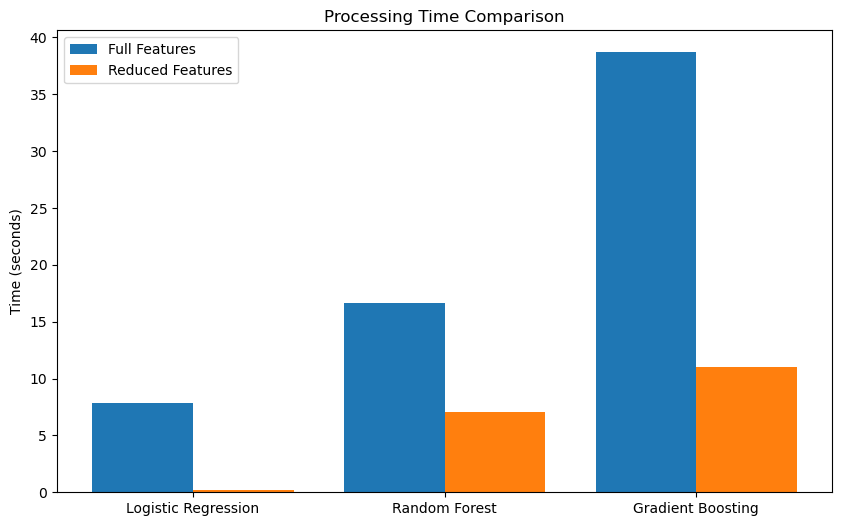

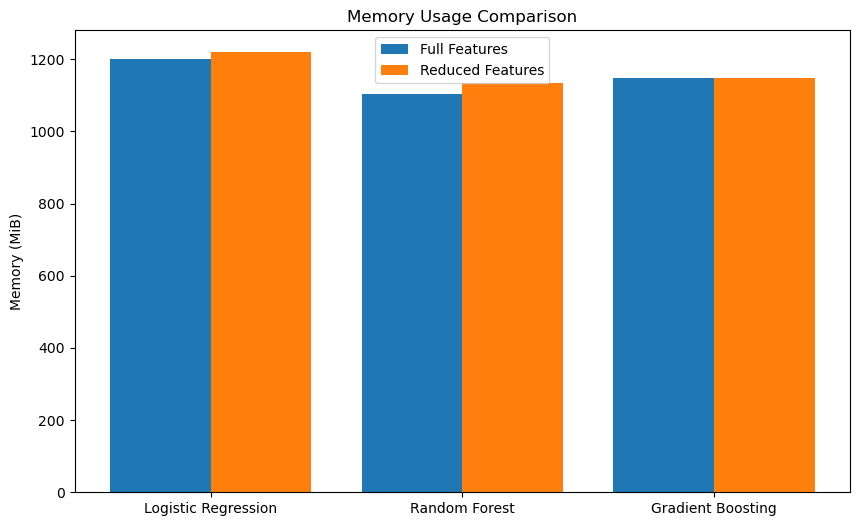

In [31]:
import matplotlib.pyplot as plt

# Results for processing time
time_results = {
    'Model': ['Logistic Regression', 'Random Forest', 'Gradient Boosting'],
    'Full Features': [log_time_full, rf_time_full, gb_time_full],
    'Reduced Features': [log_time_reduced, rf_time_reduced, gb_time_reduced]
}

# Results for memory usage
memory_results = {
    'Model': ['Logistic Regression', 'Random Forest', 'Gradient Boosting'],
    'Full Features': [log_memory_full, rf_memory_full, gb_memory_full],
    'Reduced Features': [log_memory_reduced, rf_memory_reduced, gb_memory_reduced]
}

# Plot processing time
plt.figure(figsize=(10, 6))
x = range(len(time_results['Model']))
plt.bar(x, time_results['Full Features'], width=0.4, label='Full Features', align='center')
plt.bar([p + 0.4 for p in x], time_results['Reduced Features'], width=0.4, label='Reduced Features', align='center')
plt.xticks([p + 0.2 for p in x], time_results['Model'])
plt.title('Processing Time Comparison')
plt.ylabel('Time (seconds)')
plt.legend()
plt.show()

# Plot memory usage
plt.figure(figsize=(10, 6))
x = range(len(memory_results['Model']))
plt.bar(x, memory_results['Full Features'], width=0.4, label='Full Features', align='center')
plt.bar([p + 0.4 for p in x], memory_results['Reduced Features'], width=0.4, label='Reduced Features', align='center')
plt.xticks([p + 0.2 for p in x], memory_results['Model'])
plt.title('Memory Usage Comparison')
plt.ylabel('Memory (MiB)')
plt.legend()
plt.show()

In [32]:
# Combine selected features
data_combined = X_reduced.copy()

# Create interaction terms
data_combined['GeneralHealth_DifficultyWalking'] = data_combined['GeneralHealth'] * data_combined['DifficultyWalking']
data_combined['HadAngina_AgeCategory'] = data_combined['HadAngina'] * data_combined['AgeCategory']
data_combined['PhysicalHealthDays_GeneralHealth'] = data_combined['PhysicalHealthDays'] * data_combined['GeneralHealth']

# Drop original features that have been combined
features_to_drop = ['GeneralHealth', 'DifficultyWalking', 'HadAngina', 'AgeCategory', 'PhysicalHealthDays']
data_combined = data_combined.drop(columns=features_to_drop)

# Update target variable
y_combined = y

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score

# Train/test split
X_train_combined, X_test_combined, y_train_combined, y_test_combined = train_test_split(data_combined, y_combined, test_size=0.2, random_state=42)

# Logistic Regression Model
log_model_combined = LogisticRegression(max_iter=1000)
log_model_combined.fit(X_train_combined, y_train_combined)

# Predictions and Evaluation
y_pred_combined = log_model_combined.predict(X_test_combined)
y_pred_proba_combined = log_model_combined.predict_proba(X_test_combined)[:, 1]

# Metrics
accuracy_combined = accuracy_score(y_test_combined, y_pred_combined)
roc_auc_combined = roc_auc_score(y_test_combined, y_pred_proba_combined)

print(f"Logistic Regression with Combined Features Accuracy: {accuracy_combined:.2f}")
print(f"Logistic Regression with Combined Features ROC AUC: {roc_auc_combined:.2f}")

Logistic Regression with Combined Features Accuracy: 0.95
Logistic Regression with Combined Features ROC AUC: 0.84


In [34]:
# Measure processing time for the combined features
import time

start_time = time.time()
log_model_combined.fit(X_train_combined, y_train_combined)
time_combined = time.time() - start_time

print(f"Processing Time with Combined Features: {time_combined:.2f} seconds")

Processing Time with Combined Features: 0.24 seconds


In [35]:
# Logical combinations
data_new_combined = X_reduced.copy()

# Create new interaction terms
data_new_combined['HadAngina_GeneralHealth'] = data_new_combined['HadAngina'] * data_new_combined['GeneralHealth']
data_new_combined['AgeCategory_DifficultyWalking'] = data_new_combined['AgeCategory'] * data_new_combined['DifficultyWalking']
data_new_combined['HadStroke_DifficultyWalking'] = data_new_combined['HadStroke'] * data_new_combined['DifficultyWalking']
data_new_combined['PhysicalHealthDays_HadDiabetes'] = data_new_combined['PhysicalHealthDays'] * data_new_combined['HadDiabetes']

# Drop redundant features
features_to_drop_new = ['HadAngina', 'GeneralHealth', 'AgeCategory', 'DifficultyWalking', 'HadStroke', 'PhysicalHealthDays', 'HadDiabetes']
data_new_combined = data_new_combined.drop(columns=features_to_drop_new)

# Update target variable
y_new_combined = y

In [36]:
# Train/test split
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(data_new_combined, y_new_combined, test_size=0.2, random_state=42)

# Logistic Regression Model
log_model_new_combined = LogisticRegression(max_iter=1000)
log_model_new_combined.fit(X_train_new, y_train_new)

# Predictions and Evaluation
y_pred_new_combined = log_model_new_combined.predict(X_test_new)
y_pred_proba_new_combined = log_model_new_combined.predict_proba(X_test_new)[:, 1]

# Metrics
accuracy_new_combined = accuracy_score(y_test_new, y_pred_new_combined)
roc_auc_new_combined = roc_auc_score(y_test_new, y_pred_proba_new_combined)

print(f"Logistic Regression with New Combined Features Accuracy: {accuracy_new_combined:.2f}")
print(f"Logistic Regression with New Combined Features ROC AUC: {roc_auc_new_combined:.2f}")

Logistic Regression with New Combined Features Accuracy: 0.95
Logistic Regression with New Combined Features ROC AUC: 0.85


In [37]:
import time

# Measure processing time
start_time_new = time.time()
log_model_new_combined.fit(X_train_new, y_train_new)
time_new_combined = time.time() - start_time_new

print(f"Processing Time with New Combined Features: {time_new_combined:.2f} seconds")

Processing Time with New Combined Features: 0.16 seconds


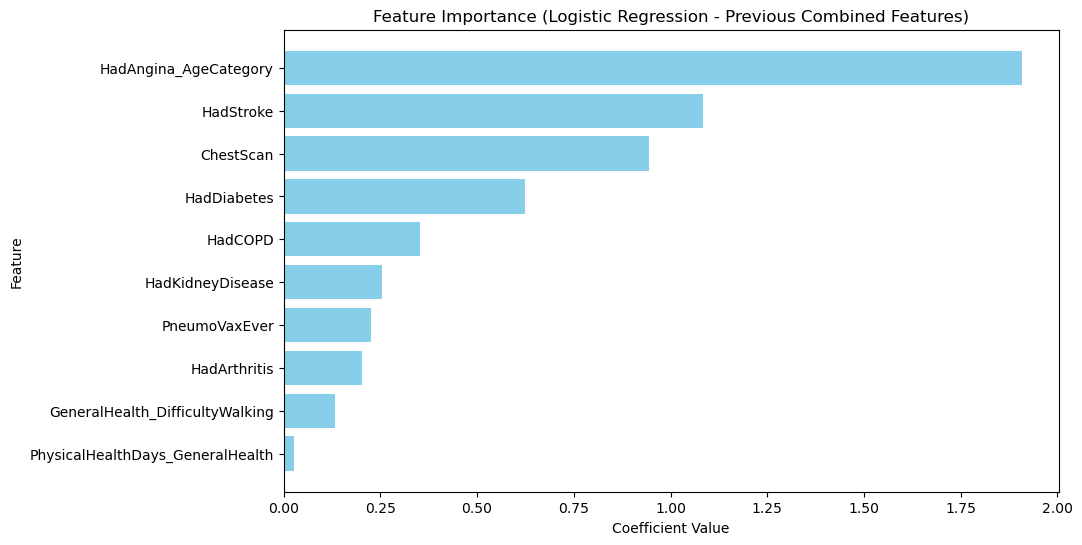

In [38]:
# Feature importance for previous combined features
coefficients_prev = log_model_combined.coef_[0]
features_prev = X_train_combined.columns

# Create DataFrame for visualization
importance_df_prev = pd.DataFrame({'Feature': features_prev, 'Coefficient': coefficients_prev})
importance_df_prev = importance_df_prev.sort_values(by='Coefficient', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df_prev['Feature'], importance_df_prev['Coefficient'], color='skyblue')
plt.title('Feature Importance (Logistic Regression - Previous Combined Features)')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.gca().invert_yaxis()
plt.show()

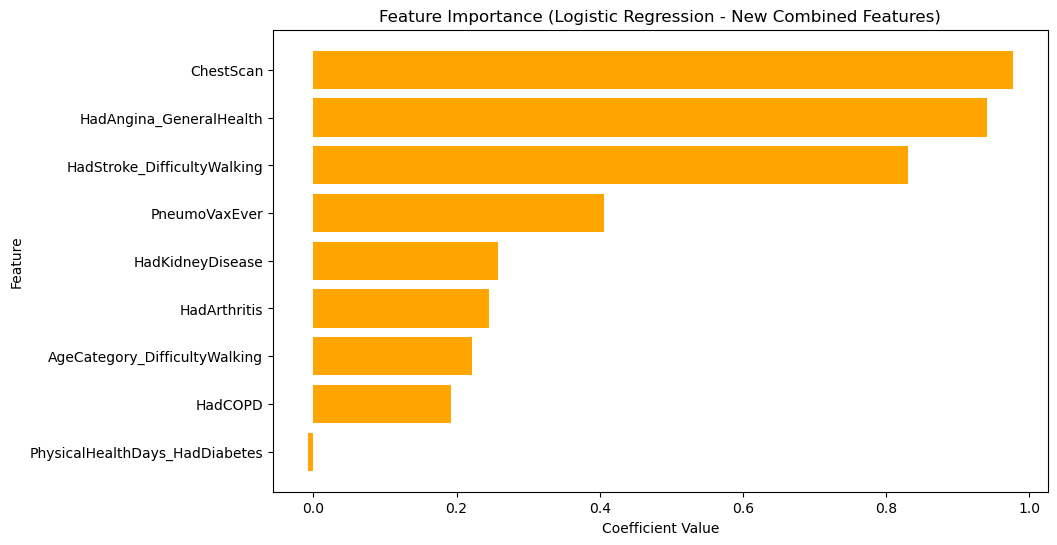

In [39]:
# Feature importance for new combined features
coefficients_new = log_model_new_combined.coef_[0]
features_new = X_train_new.columns

# Create DataFrame for visualization
importance_df_new = pd.DataFrame({'Feature': features_new, 'Coefficient': coefficients_new})
importance_df_new = importance_df_new.sort_values(by='Coefficient', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df_new['Feature'], importance_df_new['Coefficient'], color='orange')
plt.title('Feature Importance (Logistic Regression - New Combined Features)')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.gca().invert_yaxis()
plt.show()

In [44]:
# Plot feature importance for Model 2
coefficients = model_2.coef_[0]
features = X_train.columns

# Create a DataFrame for feature importances
importance_df = pd.DataFrame({'Feature': features, 'Coefficient': coefficients})
importance_df = importance_df.sort_values(by='Coefficient', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Coefficient'], color='orange')
plt.title('Feature Importance (Model 2 with Interaction Terms)')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.gca().invert_yaxis()
plt.show()

ValueError: All arrays must be of the same length

### Second Model

In [1]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Model 1's probability predictions as the target for Model 2
y_prob_train = model_2.predict_proba(X_train)[:, 1]  # Logistic regression probabilities
y_prob_test = model_2.predict_proba(X_test)[:, 1]

# Train a decision tree regressor on the same features to explain Model 1's predictions
explanation_model = DecisionTreeRegressor(max_depth=3, random_state=42)
explanation_model.fit(X_train, y_prob_train)

# Evaluate the performance of the explanation model
y_explained = explanation_model.predict(X_test)
mse = mean_squared_error(y_prob_test, y_explained)

print(f"Explanation Model MSE: {mse:.4f}")

NameError: name 'model_2' is not defined